# Business Challange

## Planning IoT

### Input

    1. Goal

        1.1 Anticipate the first destination the new user will book
    
    2. Data
        2.1 age_gender
        2.2 countries
        2.3 sessions
        2.4 test_users
        2.5 train_users

### Output

    1. Report Analysis about user behavior
    2. Machine Learning Model to predict users booking

### Tasks

    1. Define the best model with prediction
    2. Store the informaiton with prediction in a table
    3. Provide an API to access predictions

# Dev Env

## Imports

In [7]:
#============================Data Manipulation==========================
import numpy  as np
import pandas as pd
import pickle

#============================Data Visualization==========================
import seaborn           as sns
import matplotlib.pyplot as plt

#============================Machine Learning============================
import random
from keras                   import models
from keras                   import layers
from sklearn.dummy           import DummyClassifier
from sklearn.preprocessing   import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from scikitplot.metrics      import plot_confusion_matrix
from sklearn.metrics         import balanced_accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import cohen_kappa_score

## Functions

### Model Performance

In [2]:
def model_evaluation(y_true=None, y_pred=None):
    '''
    --> Show classification metrics
    
    :param y_true: The true values of target
    :param y_pred: The predictions made by model
    '''
    print(f'Accuracy: {round(accuracy_score(y_true, y_pred), 1) * 100}%')
    print(f'Balanced Accuracy Score: {round(balanced_accuracy_score(y_true, y_pred), 1) * 100}%')
    print(f'Kappa Score: {cohen_kappa_score(y_true, y_pred)}')
    
    # Confusion Matrix
    plot_confusion_matrix(y_true, y_pred)
    plt.show()

In [72]:
def model_evaluation_cv(y_true=None, y_pred=None):
    '''
    --> Show classification metrics
    
    :param y_true: The true values of target
    :param y_pred: The predictions made by model
    
    return accuracy_score, balanced_accuracy_score, kappa_score
    '''
    ac = round(accuracy_score(y_true, y_pred), 2) 
    bc = round(balanced_accuracy_score(y_true, y_pred), 2)
    ks = round(cohen_kappa_score(y_true, y_pred), 4)
    return ac, bc, ks

## Settings

In [3]:
# Random seed
seed = random.seed(24)
plt.rcParams['figure.figsize'] = [12,8]

## Data Raw

In [8]:
# age_gender
age_gender = pd.read_csv('../data/age_gender_bkts.csv')

# countries
countries = pd.read_csv('../data/countries.csv')

# sessions
sessions = pd.read_csv('../data/sessions.csv')

# train users
train_users = pd.read_csv('../data/train_users_2.csv')

# Data Description

## Data Input

In [17]:
df1 = train_users.copy()
df1.head(3)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US


## Data Types

In [18]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [19]:
# Change
# date_account_created        datetime
# date_first_booking          datetime
# age                         int
# signup_flow                 int64

## Check NaN

In [20]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## Fill NaN

In [27]:
df1.dropna(inplace=True)

## Change Types

In [28]:
# Change
# date_account_created        datetime
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])

# date_first_booking          datetime
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

# age                         int
df1['age'] = df1['age'].astype('int64')
                                           
# signup_flow                 int64
df1['signup_flow'] = df1['signup_flow'].astype('int64') 

## Check Balanced Data

In [30]:
round(df1['country_destination'].value_counts(normalize=True) * 100, 1)

US       70.9
other    11.1
FR        5.4
IT        3.0
GB        2.6
ES        2.5
CA        1.6
DE        1.2
NL        0.9
AU        0.6
PT        0.2
Name: country_destination, dtype: float64

## Data Output

In [45]:
df1.to_csv('../data/processed/df1.csv', index=False)

# Feature Engineering

# EDA

# Data Filter

## Data Input

In [76]:
df6 = pd.read_csv('../data/processed/df1.csv')

## Cols drop

In [77]:
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking']
df6.drop(columns=cols_drop, inplace=True)

## Data Output

In [78]:
df6.to_csv('../data/processed/df_filter.csv', index=False)

# Data Preparation

## Data Input

In [125]:
df7 = pd.read_csv('../data/processed/df_filter.csv')

In [130]:
# Dummies
to_dummies = df7.drop(columns=['id', 'age', 'signup_flow', 'country_destination'])
no_dummies = df7[['id', 'age', 'signup_flow', 'country_destination']]

In [131]:
# Get dummies
to_dummies = pd.get_dummies(to_dummies)

# Concat data
df7_dummies = pd.concat([no_dummies, to_dummies], axis=1)

## Split Data

In [132]:
X = df7_dummies.drop(columns='country_destination')
y = df7_dummies['country_destination']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Encoder

In [133]:
# ======================================OneHotEncoder======================================
# Train
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()
pickle.dump(ohe, open('../data/models/one_hot_country_destination.pkl', 'wb'))

## Data Output

In [134]:
# X data
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)

# Y data
pd.DataFrame(y_train).to_csv('../data/processed/y_train.csv', index=False) 
y_test.to_csv('../data/processed/y_test.csv', index=False)

# Feature Selection

## Data Input

# ML Model

## Data Input

In [4]:
x_train = pd.read_csv('../data/processed/X_train.csv').drop(columns='id')
x_test  = pd.read_csv('../data/processed/X_test.csv').drop(columns='id')

y_train = pd.read_csv('../data/processed/y_train.csv').values
y_test = pd.read_csv('../data/processed/y_test.csv')

ohe = pickle.load(open('../data/models/one_hot_country_destination.pkl', 'rb'))

## Baseline Model

Accuracy: 70.0%
Balanced Accuracy Score: 10.0%
Kappa Score: 0.0


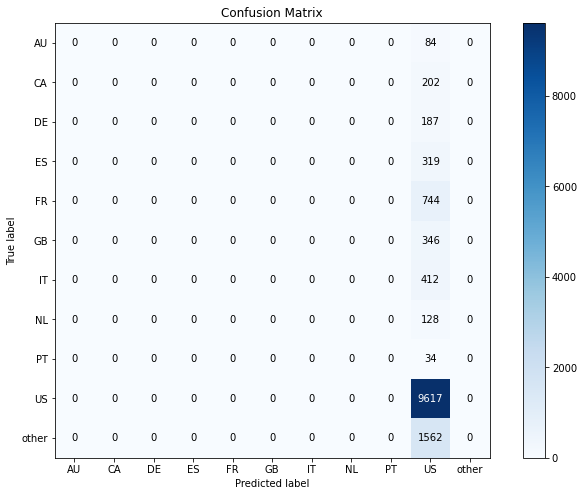

In [75]:
# Model definition
baseline_model = DummyClassifier(strategy='most_frequent', random_state=seed)

# Train
baseline_model.fit(x_train, y_train)

# prediction
yhat = baseline_model.predict(x_test)
yhat = ohe.inverse_transform(yhat)

# performance
model_evaluation(y_test.values.flatten(), yhat.flatten())

### Cross-Validation

In [23]:
cross_val_score(DummyClassifier(strategy='most_frequent', random_state=seed), x_train, y_train,
               scoring='accuracy')

array([0.70498717, 0.70881086, 0.70560191, 0.71907949, 0.7102778 ])

## Neural Network

In [59]:
# Model definition
model = models.Sequential()
model.add(layers.Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(layers.Dense(11, activation='softmax'))

# model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1705/1705 [==============================] - 1s 702us/step - loss: 1.3400 - accuracy: 0.7039
Epoch 2/100
1705/1705 [==============================] - 1s 711us/step - loss: 1.2718 - accuracy: 0.7073
Epoch 3/100
1705/1705 [==============================] - 1s 719us/step - loss: 1.2596 - accuracy: 0.7084
Epoch 4/100
1705/1705 [==============================] - 1s 704us/step - loss: 1.2393 - accuracy: 0.7082
Epoch 5/100
1705/1705 [==============================] - 1s 710us/step - loss: 1.2138 - accuracy: 0.7081
Epoch 6/100
1705/1705 [==============================] - 1s 717us/step - loss: 1.1976 - accuracy: 0.7087
Epoch 7/100
1705/1705 [==============================] - 1s 716us/step - loss: 1.1803 - accuracy: 0.7085
Epoch 8/100
1705/1705 [==============================] - 1s 715us/step - loss: 1.1670 - accuracy: 0.7088
Epoch 9/100
1705/1705 [==============================] - 1s 718us/step - loss: 1.1543 - accuracy: 0.7088
Epoch 10/100
1705/1705 [==============================]

In [61]:
pickle.dump(model, open('../data/models/neural_network.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://612c82fb-f7e5-4433-afbd-5cd1e6dd8851/assets


In [62]:
# Prediction
pred_nn = model.predict(x_test)

# Invert prediction
yhat_nn = ohe.inverse_transform(pred_nn).flatten()

# Prediction prepare
y_test_nn = y_test.to_numpy().flatten()

Accuracy: 70.0%
Balanced Accuracy Score: 10.0%
Kappa Score: -0.0006418754086374712


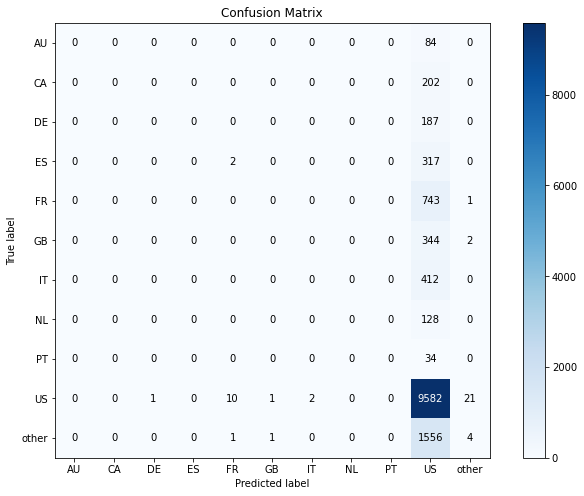

In [76]:
# Accuracy
print(f'Accuracy: {round(accuracy_score(y_test_nn, yhat_nn), 1) * 100}%')
print(f'Balanced Accuracy Score: {round(balanced_accuracy_score(y_test_nn, yhat_nn), 1) * 100}%')
print(f'Kappa Score: {cohen_kappa_score(y_test_nn, yhat_nn)}')

# Confusion Matrix
plot_confusion_matrix(y_test_nn, yhat_nn)
plt.show()

### Neural Network Cross-Validation

In [74]:
n_folds = 5
kfold = StratifiedKFold(n_folds, shuffle=True, random_state=seed)

y_train_f = pd.Series(ohe.inverse_transform(y_train).ravel())
accuracy_list = list()
balanced_accuracy_list = list()
kappa_score_list = list()

for train_ix, val_ix in kfold.split(x_train, y_train_f):
    # Data
    x_train_fold = x_train.iloc[train_ix]
    y_train_fold = y_train_f.iloc[train_ix]
    
    x_val_fold = x_train.iloc[val_ix]
    y_val_fold = y_train_f.iloc[val_ix]
    
    # Model definition
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=x_train_fold.shape[1], activation='relu'))
    model.add(layers.Dense(11, activation='softmax'))
    
    # model compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # OneHotEncoder
    y_train_fold = ohe.fit_transform(y_train_fold.values.reshape(-1, 1)).toarray()
    # Train
    model.fit(x_train_fold, y_train_fold, epochs=100, verbose=0)
    
    # Prediction
    pred_nn = model.predict(x_val_fold)
    
    # Invert prediction
    yhat_nn = ohe.inverse_transform(pred_nn).flatten()
    
    # Prediction prepare
    y_test_nn = y_val_fold.to_numpy().flatten()
    
    #Evaluation
    ac, bc, ks = model_evaluation_cv(y_test_nn, yhat_nn)
    accuracy_list.append(ac)
    balanced_accuracy_list.append(bc)
    kappa_score_list.append(ks)
    
print(f'Accuracy Score: {round(np.mean(accuracy_list), 2)} ± {round(np.std(accuracy_list), 2)}')
print(f'Balanced Accuracy Score: {round(np.mean(balanced_accuracy_list), 2)} ± {round(np.std(balanced_accuracy_list), 2)}')
print(f'Kappa Score: {round(np.mean(kappa_score_list), 4)} ± {round(np.std(kappa_score_list), 4)}')

Accuracy Score: 0.7 ± 0.0
Balanced Accuracy Score: 0.1 ± 0.0
Kappa Score: 0.00324 ± 0.0025507645912549444


## Data Output

# Model Performance

# Deploy